# ** PROJET 2 - Analyse des données de systèmes éducatifs **


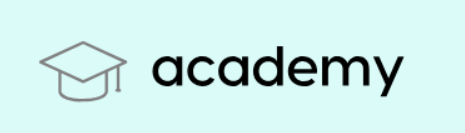

> **Academy**, startup proposant des cours en ligne, a le projet de se développer à l'international.
Il nous confie la mission d'analyse exploratoire pour savoir si les données de la Banque Mondiale permettennt de valider le projet d'expansion.


In [6]:
! pip install missingno

In [7]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import geopandas as gpd
import missingno as msno

In [8]:
df = pd.read_csv('EdStatsData.csv', sep = ',')

In [9]:
df.shape

(886930, 70)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [11]:
df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_suppr70 = df.drop(['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979'], axis=1)

In [13]:
df_suppr80 = df_suppr70.drop(['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989'], axis=1)

In [14]:
df_suppr90 = df_suppr80.drop(['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999'], axis=1)

In [15]:
df_suppr_prevision = df_suppr90.drop(['2020','2025','2030','2035','2040','2045','2050','2055','2060','2065','2070','2075','2080','2085','2090','2095', '2100'], axis = 1)

In [16]:
df_recent = df_suppr_prevision.drop(['Indicator Code'], axis=1)

In [17]:
df_base_date = df_recent.rename(columns = {'Unnamed: 69':'Dernières données à jour'})

In [18]:
df_base_date.head(20)

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernières données à jour
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",7.724568e+01,7.880052e+01,8.005140e+01,8.080539e+01,8.160706e+01,8.248949e+01,8.268551e+01,...,8.419596e+01,8.521200e+01,8.524514e+01,8.610167e+01,8.551194e+01,8.532015e+01,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",7.327562e+01,7.513298e+01,7.664102e+01,7.765358e+01,7.848540e+01,7.947577e+01,7.960833e+01,...,8.169569e+01,8.287165e+01,8.286139e+01,8.440141e+01,8.391403e+01,8.382083e+01,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",9.040600e-01,9.127500e-01,9.197900e-01,9.263000e-01,9.276800e-01,9.308400e-01,9.296200e-01,...,9.434700e-01,9.476200e-01,9.467000e-01,9.620800e-01,9.640900e-01,9.662000e-01,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",8.105137e+01,8.231505e+01,8.332406e+01,8.383223e+01,8.460439e+01,8.538029e+01,8.563508e+01,...,8.659069e+01,8.745258e+01,8.752652e+01,8.772817e+01,8.703988e+01,8.675339e+01,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_geo = pd.read_csv('EdStatsCountry.csv')

In [20]:
df_geo.shape

(241, 32)

In [21]:
df_geo.head(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,AE,...,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,2012,NaN,2011.0,2005,NaN
7,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,...,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.0,2012.0,2000,NaN
8,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2010","Integrated household survey (IHS), 2012",Yes,2013/14,NaN,2012.0,2007,NaN
9,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN,NaN


In [22]:
df_base_geo1 = df_geo.drop(['Table Name','Long Name','2-alpha code','Currency Unit','Special Notes','WB-2 code','National accounts base year','National accounts reference year','SNA price valuation','Lending category'], axis=1)

In [23]:
df_base_geo2 = df_base_geo1.drop(['Other groups','System of National Accounts','Alternative conversion factor','PPP survey year','Balance of Payments Manual in use','External debt Reporting status','System of trade','Government Accounting concept','IMF data dissemination standard','Latest population census'], axis=1)

In [24]:
df_base_geo = df_base_geo2.drop(['Latest household survey','Source of most recent Income and expenditure data','Vital registration complete','Latest agricultural census','Latest industrial data','Latest trade data','Latest water withdrawal data','Unnamed: 31'], axis=1)

In [25]:
df_base_geo.head(10)

,Country Code,Short Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income: nonOECD
5,ARB,Arab World,NaN,NaN
6,ARE,United Arab Emirates,Middle East & North Africa,High income: nonOECD
7,ARG,Argentina,Latin America & Caribbean,Upper middle income
8,ARM,Armenia,Europe & Central Asia,Lower middle income
9,ASM,American Samoa,East Asia & Pacific,Upper middle income


In [26]:
df_base_geo.loc[df_base_geo['Region'].isna(),:]

,Country Code,Short Name,Region,Income Group
5,ARB,Arab World,NaN,NaN
57,EAP,East Asia & Pacific (developing only),NaN,NaN
58,EAS,East Asia & Pacific (all income levels),NaN,NaN
59,ECA,Europe & Central Asia (developing only),NaN,NaN
60,ECS,Europe & Central Asia (all income levels),NaN,NaN
63,EMU,Euro area,NaN,NaN
68,EUU,European Union,NaN,NaN
78,GIB,Gibraltar,NaN,NaN
89,HIC,High income,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),NaN,NaN


In [27]:
df_base_geo.loc[df_base_geo['Income Group'].isna(),:]

,Country Code,Short Name,Region,Income Group
5,ARB,Arab World,NaN,NaN
57,EAP,East Asia & Pacific (developing only),NaN,NaN
58,EAS,East Asia & Pacific (all income levels),NaN,NaN
59,ECA,Europe & Central Asia (developing only),NaN,NaN
60,ECS,Europe & Central Asia (all income levels),NaN,NaN
63,EMU,Euro area,NaN,NaN
68,EUU,European Union,NaN,NaN
78,GIB,Gibraltar,NaN,NaN
89,HIC,High income,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),NaN,NaN


In [28]:
# Regroupage des 2 dataframes pour récupérer les Régions et Groupes de revenus pour chaque pays

df_concat = df_base_date.merge(df_base_geo, how='inner', on='Country Code')

In [29]:
df_base = df_concat[['Region','Income Group','Country Name','Country Code','Indicator Name','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017', 'Dernières données à jour']]

In [30]:
df_base.reset_index(drop = True, inplace = True)

In [31]:
df_base.tail(20)

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernières données à jour
883245,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,...,NaN,299.29,NaN,NaN,NaN,NaN,234.92,NaN,NaN,NaN
883246,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,...,NaN,109.81,NaN,NaN,NaN,NaN,78.02,NaN,NaN,NaN
883247,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,...,NaN,409.11,NaN,NaN,NaN,NaN,312.94,NaN,NaN,NaN
883248,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,...,NaN,106.88,NaN,NaN,NaN,NaN,135.18,NaN,NaN,NaN
883249,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,...,NaN,197.61,NaN,NaN,NaN,NaN,234.94,NaN,NaN,NaN
883250,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,...,NaN,304.50,NaN,NaN,NaN,NaN,370.12,NaN,NaN,NaN
883251,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,...,NaN,815.28,NaN,NaN,NaN,NaN,752.87,NaN,NaN,NaN
883252,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,...,NaN,799.57,NaN,NaN,NaN,NaN,721.56,NaN,NaN,NaN
883253,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,...,NaN,1614.84,NaN,NaN,NaN,NaN,1474.43,NaN,NaN,NaN
883254,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,...,NaN,1401.82,NaN,NaN,NaN,NaN,1722.96,NaN,NaN,NaN


### INDICATEURS POPULATIONS

In [32]:
# Population totale =
# Population, total

df_pop1 = df_base[df_base['Indicator Name'].isin(['Population, total'])]

# 240 remplis en 2010

In [33]:
df_pop1.loc[df_pop1['Country Name'].duplicated(keep=False),:]

# Vérifier qu'il n'y a pas de doublon de pays

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernières données à jour


In [34]:
df_pop1_complet = df_pop1.fillna(method ='ffill', axis = 1) 

In [35]:
df_pop1_complet.dtypes

Region                      object
Income Group                object
Country Name                object
Country Code                object
Indicator Name              object
2000                        object
2001                        object
2002                        object
2003                        object
2004                        object
2005                        object
2006                        object
2007                        object
2008                        object
2009                        object
2010                        object
2011                        object
2012                        object
2013                        object
2014                        object
2015                        object
2016                        object
2017                        object
Dernières données à jour    object
dtype: object

In [36]:
df_pop1_complet['Dernières données à jour'] = pd.to_numeric(df_pop1_complet['Dernières données à jour'],errors='coerce', downcast="float")

In [37]:
# df_pop1_complet['2000', '2001'].astype(float64)
# Ne fonctionne pas pour mettre toutes les années en float64

In [38]:
df_pop1_complet.shape

(241, 24)

<AxesSubplot:>

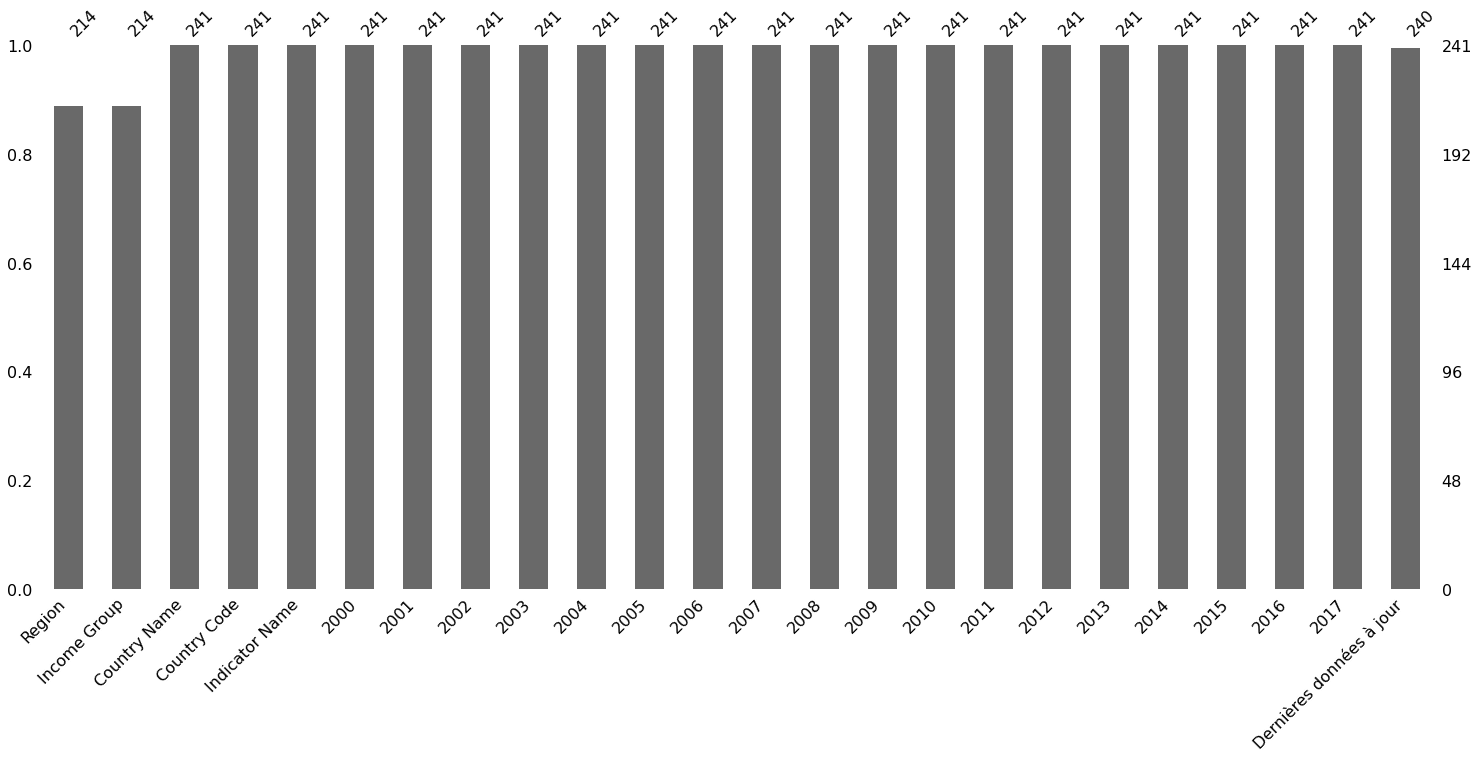

In [39]:
msno.bar(df_pop1_complet.sample(241))

In [40]:
threshold_low_population = 500000
threshold_upper_population = 2e+08

In [41]:
# NE FONCTIONNE PAS: df_pop1_selection = df_pop1_complet.loc[(df_pop1_complet['Dernières données à jour'] > threshold_low_population) or (df_pop1_complet['Dernières données à jour'] > threshold_upper_population),:]

# ==> The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [42]:
df_pop1_selection_upper = df_pop1_complet[df_pop1_complet['Dernières données à jour'] > threshold_low_population]

In [43]:
df_pop1_selection = df_pop1_selection_upper[df_pop1_selection_upper['Dernières données à jour'] < threshold_upper_population]

In [44]:
df_pop1_selection.sort_values('Dernières données à jour', ascending = False).head(20)

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernières données à jour
632913,South Asia,Lower middle income,Pakistan,PAK,"Population, total",138523285.0,141601437.0,144654143.0,147703401.0,150780300.0,...,167049580.0,170560182.0,174184265.0,177911533.0,181712595.0,185546257.0,189380513.0,193203476.0,193203476.0,193203472.0
618253,Sub-Saharan Africa,Lower middle income,Nigeria,NGA,"Population, total",122352009.0,125463434.0,128666710.0,131972533.0,135393616.0,...,154402181.0,158578261.0,162877076.0,167297284.0,171829303.0,176460502.0,181181744.0,185989640.0,185989640.0,185989632.0
149133,South Asia,Low income,Bangladesh,BGD,"Population, total",131581243.0,134107160.0,136600667.0,139019001.0,141307489.0,...,150454708.0,152149102.0,153911916.0,155727053.0,157571292.0,159405279.0,161200886.0,162951560.0,162951560.0,162951552.0
676893,Europe & Central Asia,High income: nonOECD,Russian Federation,RUS,"Population, total",146596557.0,145976083.0,145306046.0,144648257.0,144067054.0,...,142785342.0,142849449.0,142960868.0,143201676.0,143506911.0,143819666.0,144096870.0,144342396.0,144342396.0,144342400.0
555948,Latin America & Caribbean,Upper middle income,Mexico,MEX,"Population, total",101719673.0,103067068.0,104355608.0,105640453.0,106995583.0,...,115505228.0,117318941.0,119090017.0,120828307.0,122535969.0,124221600.0,125890949.0,127540423.0,127540423.0,127540424.0
445998,East Asia & Pacific,High income: OECD,Japan,JPN,"Population, total",126843000.0,127149000.0,127445000.0,127718000.0,127761000.0,...,128047000.0,128070000.0,127833000.0,127629000.0,127445000.0,127276000.0,127141000.0,126994511.0,126994511.0,126994512.0
654903,East Asia & Pacific,Lower middle income,Philippines,PHL,"Population, total",77991569.0,79665315.0,81352060.0,83031954.0,84678493.0,...,92220879.0,93726624.0,95277940.0,96866642.0,98481032.0,100102249.0,101716359.0,103320222.0,103320222.0,103320224.0
321388,Sub-Saharan Africa,Low income,Ethiopia,ETH,"Population, total",66537331.0,68492257.0,70497192.0,72545144.0,74624405.0,...,85416253.0,87702670.0,90046756.0,92444183.0,94887724.0,97366774.0,99873033.0,102403196.0,102403196.0,102403200.0
303063,Middle East & North Africa,Lower middle income,"Egypt, Arab Rep.",EGY,"Population, total",69905988.0,71226940.0,72590118.0,73981942.0,75381899.0,...,82465022.0,84107606.0,85897561.0,87813257.0,89807433.0,91812566.0,93778172.0,95688681.0,95688681.0,95688680.0
863808,East Asia & Pacific,Lower middle income,Vietnam,VNM,"Population, total",77630900.0,78620500.0,79537700.0,80467400.0,81436400.0,...,86025000.0,86932500.0,87860300.0,88809200.0,89759500.0,90728900.0,91713300.0,92701100.0,92701100.0,92701104.0


In [45]:
df_pop1_selection.loc[:,['Country Name','Dernières données à jour']].sort_values('Dernières données à jour', ascending = False).head(10)

,Country Name,Dernières données à jour
632913,Pakistan,193203472.0
618253,Nigeria,185989632.0
149133,Bangladesh,162951552.0
676893,Russian Federation,144342400.0
555948,Mexico,127540424.0
445998,Japan,126994512.0
654903,Philippines,103320224.0
321388,Ethiopia,102403200.0
303063,"Egypt, Arab Rep.",95688680.0
863808,Vietnam,92701104.0


### Population d'âge officiel pour le secondaire supérieur // INDICATEUR NON CONSERVE

In [46]:
# Population d'âge officiel pour le secondaire supérieur =
# Population of the official age for upper secondary education, both sexes (number)

# df_pop2 = df_base[df_base['Indicator Name'].isin(['Population of the official age for upper secondary education, both sexes (number)'])]

# 220 remplis en 2010

In [47]:
# df_pop2_suppr = df_pop2.dropna(thresh = 10)
# pour supprimer les pays qui contiennent au moins 5 valeurs différentes de Nan

In [48]:
# df_pop2_complet = df_pop2_suppr.fillna(method ='ffill', axis = 1) 

In [49]:
# df_pop2_complet['Dernières données à jour'] = pd.to_numeric(df_pop2_complet['Dernières données à jour'],errors='coerce', downcast="float")

In [50]:
# df_pop2_complet.head (10)

## POPULATIONS CIBLES
### 1. Taux net de scolarisation // NON CONSERVE

In [51]:
# Taux net de scolarisation ajusté, deuxième cycle du secondaire, les deux sexes (%) =
# Adjusted net enrolment rate, upper secondary, both sexes (%)

# df_secondaire1 = df_base[df_base['Indicator Name'].isin(['Adjusted net enrolment rate, upper secondary, both sexes (%)'])]

# 100 remplis en 2010

In [52]:
# df_secondaire1_suppr = df_secondaire1.dropna(thresh = 3)
# pour supprimer les pays qui contiennent au moins 5 valeurs différentes de NaN

In [53]:
#df_secondaire1_complet = df_secondaire1_suppr.fillna(method ='ffill', axis = 1) 

In [54]:
# df_secondaire1_complet['Dernières données à jour'] = pd.to_numeric(df_secondaire1_complet['Dernières données à jour'],errors='coerce', downcast="float")

In [55]:
# df_secondaire1_complet

### 2. Barro Lee: % 15 ans et plus, études complètes // NON CONSERVE

In [56]:
# Barro-Lee : Pourcentage de la population âgée de 15 ans et plus ayant fait des études secondaires. Secondaire terminé =
# Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary

# df_secondaire2 = df_base[df_base['Indicator Name'].isin(['Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary'])]

# 144 remplis en 2010

In [57]:
# df_secondaire2_suppr = df_secondaire2.dropna(thresh = 3)
# pour supprimer les pays qui contiennent au moins 5 valeurs différentes de NaN

In [58]:
# df_secondaire2_complet = df_secondaire2_suppr.fillna(method ='ffill', axis = 1) 

In [59]:
# df_secondaire2_complet['Dernières données à jour'] = pd.to_numeric(df_secondaire2_complet['Dernières données à jour'],errors='coerce', downcast="float")

In [60]:
# df_secondaire2_complet.head(20)

In [61]:
# df_secondaire2_complet.shape

### 3. Scolarisation dans le secondaire

In [62]:
# Scolarisation dans l'enseignement secondaire, les deux sexes = 
# Enrolment in secondary education, both sexes (number) 

df_secondaire3 = df_base[df_base['Indicator Name'].isin(['Enrolment in secondary education, both sexes (number)'])]

# 183 remplis en 2004

In [63]:
df_secondaire3.shape

(241, 24)

<AxesSubplot:>

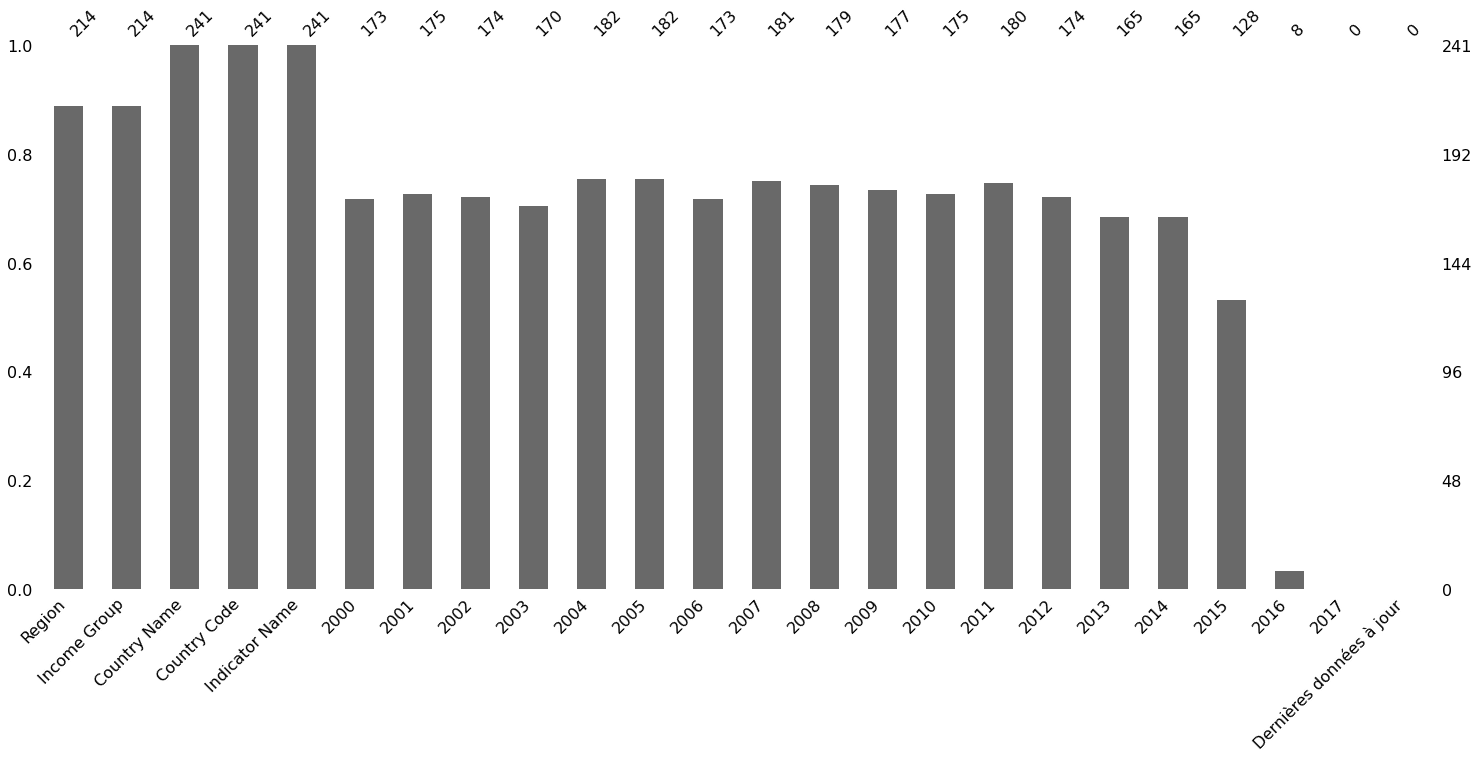

In [64]:
msno.bar(df_secondaire3.sample(241))

In [65]:
df_secondaire3_complet = df_secondaire3.fillna(method ='ffill', axis = 1) 

In [66]:
df_secondaire3_complet['Dernières données à jour'] = pd.to_numeric(df_secondaire3_complet['Dernières données à jour'],errors='coerce', downcast="float")

In [67]:
df_secondaire3_complet.sort_values('Dernières données à jour', ascending = False).head(50)

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernières données à jour
89151,NaN,NaN,World,WLD,"Enrolment in secondary education, both sexes (...",452666048.0,464188512.0,477663776.0,490835264.0,500953568.0,...,534709504.0,545119424.0,554075072.0,561067712.0,572499584.0,578766464.0,579206656.0,579206656.0,579206656.0,579206656.0
45171,NaN,NaN,Low & middle income,LMY,"Enrolment in secondary education, both sexes (...",362519264.0,373507904.0,386719840.0,399285792.0,410290304.0,...,445634944.0,456612512.0,466131072.0,472896736.0,480054336.0,477174112.0,477174112.0,477174112.0,477174112.0,477174112.0
63496,NaN,NaN,Middle income,MIC,"Enrolment in secondary education, both sexes (...",348902752.0,358882528.0,370936320.0,382482368.0,392127264.0,...,418333312.0,426982176.0,434741184.0,440420672.0,448115904.0,453790464.0,453920000.0,453920000.0,453920000.0,453920000.0
52501,NaN,NaN,Lower middle income,LMC,"Enrolment in secondary education, both sexes (...",156851040.0,160880784.0,167412144.0,175905024.0,181869120.0,...,208929920.0,218579184.0,227701200.0,236338912.0,240849216.0,249514640.0,252802720.0,252802720.0,252802720.0,252802720.0
85486,NaN,NaN,Upper middle income,UMC,"Enrolment in secondary education, both sexes (...",192051728.0,198001728.0,203524160.0,206577360.0,210258144.0,...,209403376.0,208402976.0,207039984.0,204081760.0,207266704.0,204275808.0,201117296.0,201117296.0,201117296.0,201117296.0
4856,NaN,NaN,East Asia & Pacific,EAS,"Enrolment in secondary education, both sexes (...",137120400.0,142236000.0,147389600.0,153615632.0,158087248.0,...,163384176.0,162608224.0,161644832.0,159734416.0,159612656.0,154212112.0,154212112.0,154212112.0,154212112.0,154212112.0
74491,NaN,NaN,South Asia,SAS,"Enrolment in secondary education, both sexes (...",91186912.0,93089328.0,97469352.0,102487208.0,106333832.0,...,128115096.0,136024608.0,142930752.0,149838976.0,151855728.0,153192192.0,153192192.0,153192192.0,153192192.0,153192192.0
8521,NaN,NaN,East Asia & Pacific (excluding high income),EAP,"Enrolment in secondary education, both sexes (...",120642552.0,126189616.0,131608176.0,138026560.0,142747680.0,...,148467680.0,147759424.0,146866768.0,144989232.0,144990816.0,139756448.0,139756448.0,139756448.0,139756448.0,139756448.0
411671,South Asia,Lower middle income,India,IND,"Enrolment in secondary education, both sexes (...",71030512.0,72392728.0,76215688.0,81050128.0,84569080.0,...,101110384.0,107686864.0,113727864.0,119148200.0,119400528.0,129438992.0,129542056.0,129542056.0,129542056.0,129542056.0
70826,NaN,NaN,OECD members,OED,"Enrolment in secondary education, both sexes (...",100035792.0,101411184.0,102143760.0,103217928.0,102038936.0,...,102001368.0,102264192.0,101980024.0,101576664.0,107318792.0,107619152.0,107619152.0,107619152.0,107619152.0,107619152.0


In [68]:
df_secondaire3_complet.groupby('Region').median('Dernières données à jour')

,Dernières données à jour
Region,
East Asia & Pacific,330163.0
Europe & Central Asia,553448.0
Latin America & Caribbean,278941.0
Middle East & North Africa,766943.0
North America,2697507.0
South Asia,2988023.5
Sub-Saharan Africa,567838.0


In [69]:
df_secondaire3_selection = df_secondaire3_complet.dropna(subset=['Region'])
# Supprime les régions et les incomes groupe

In [70]:
df_secondaire3_selection

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernières données à jour
92816,South Asia,Low income,Afghanistan,AFG,"Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...",362415.0,362415.0,406895.0,594306.0,...,1716190.0,2044157.0,2208963.0,2415884.0,2538420.0,2602734.0,2698816.0,2698816.0,2698816.0,2698816.0
96481,Europe & Central Asia,Upper middle income,Albania,ALB,"Enrolment in secondary education, both sexes (...",365664.0,377936.0,382205.0,396095.0,393503.0,...,354587.0,355871.0,355158.0,349269.0,346365.0,333291.0,315079.0,315079.0,315079.0,315079.0
100146,Middle East & North Africa,Upper middle income,Algeria,DZA,"Enrolment in secondary education, both sexes (...",2994258.0,3188826.0,3352340.0,3455930.0,3604785.0,...,4576166.0,4616226.0,4572513.0,4572513.0,4572513.0,4572513.0,4572513.0,4572513.0,4572513.0,4572513.0
103811,East Asia & Pacific,Upper middle income,American Samoa,ASM,"Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...",...,"Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...",NaN
107476,Europe & Central Asia,High income: nonOECD,Andorra,AND,"Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...",3132.0,3194.0,3250.0,...,3914.0,4059.0,4159.0,4208.0,4239.0,4319.0,4395.0,4395.0,4395.0,4395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866131,Latin America & Caribbean,High income: nonOECD,Virgin Islands (U.S.),VIR,"Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...",...,"Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...",NaN
869796,Middle East & North Africa,Lower middle income,West Bank and Gaza,PSE,"Enrolment in secondary education, both sexes (...",477378.0,510214.0,544935.0,582736.0,628495.0,...,713921.0,710936.0,705627.0,705443.0,706330.0,709226.0,721414.0,721414.0,721414.0,721414.0
873461,Middle East & North Africa,Lower middle income,"Yemen, Rep.",YEM,"Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...",1249016.0,1249016.0,1373362.0,1446369.0,...,1479157.0,1561337.0,1643116.0,1674950.0,1768102.0,1768102.0,1768102.0,1768102.0,1768102.0,1768102.0
877126,Sub-Saharan Africa,Lower middle income,Zambia,ZMB,"Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...",

In [71]:
df_secondaire3_selection.loc[:,['Country Name','Dernières données à jour']].sort_values('Dernières données à jour', ascending = False).head(10)

,Country Name,Dernières données à jour
411671,India,129542056.0
239416,China,86127200.0
844141,United States,24229776.0
415336,Indonesia,23756316.0
188106,Brazil,23501784.0
147791,Bangladesh,14566771.0
554606,Mexico,12993322.0
616911,Nigeria,12532753.0
631571,Pakistan,12077917.0
814821,Turkey,10969178.0


## INDICATEURS GOUV
### Dépenses pour le secondaire % des dépenses publiques

In [72]:
# Dépenses pour le secondaire en % des dépenses publiques d'éducation = 
# Expenditure on secondary as % of government expenditure on education (%) 

df_aide_gouvernement1 = df_base[df_base['Indicator Name'].isin(['Expenditure on secondary as % of government expenditure on education (%)'])]

# 107 en 2010

In [73]:
df_aide_gouvernement1.shape

(241, 24)

<AxesSubplot:>

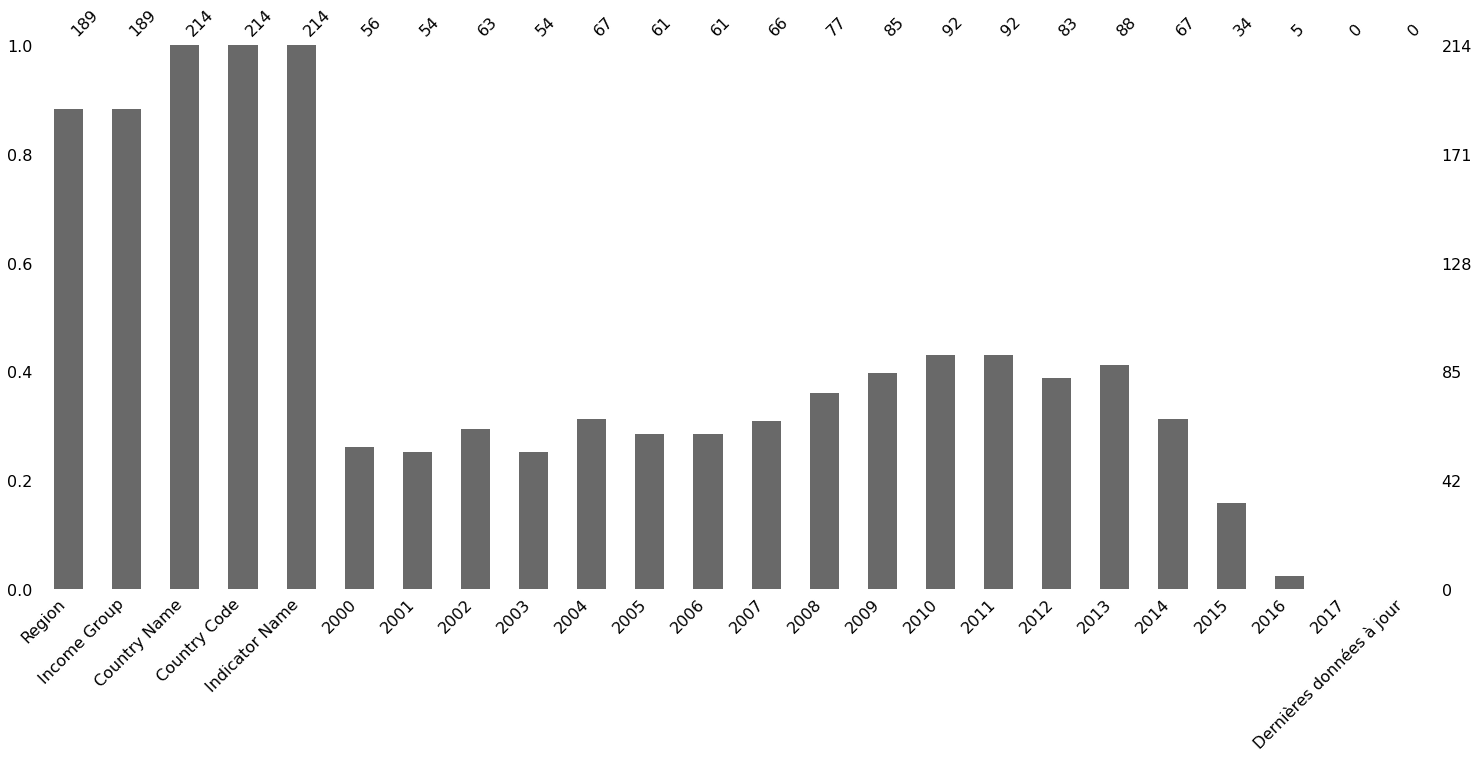

In [74]:
msno.bar(df_aide_gouvernement1.sample(214))

In [75]:
df_aide_gouvernement1_complet = df_aide_gouvernement1.fillna(method ='ffill', axis = 1) 

In [76]:
df_aide_gouvernement1_complet['Dernières données à jour'] = pd.to_numeric(df_aide_gouvernement1_complet['Dernières données à jour'],errors='coerce', downcast="float")

In [77]:
df_aide_gouvernement1_complet.sort_values('Dernières données à jour', ascending = False).head(20)

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernières données à jour
452031,Europe & Central Asia,Upper middle income,Kazakhstan,KAZ,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,65.760048,65.760048,65.760048,65.760048
550986,Sub-Saharan Africa,Upper middle income,Mauritius,MUS,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,40.6777,38.302219,39.791431,40.23315,...,47.930641,52.646061,48.716579,53.754059,54.478619,61.626251,64.140472,64.140472,64.140472,64.140472
191816,East Asia & Pacific,High income: nonOECD,Brunei Darussalam,BRN,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,...,Expenditure on secondary as % of government ex...,46.781631,46.781631,46.781631,46.781631,38.685341,38.685341,60.844349,60.844349,60.844349
514336,East Asia & Pacific,High income: nonOECD,"Macao SAR, China",MAC,Expenditure on secondary as % of government ex...,24.97225,24.97225,24.97225,24.97225,24.97225,...,24.97225,24.97225,24.97225,31.864941,55.062309,55.062309,55.062309,55.062309,55.062309,55.062309
122181,Europe & Central Asia,Lower middle income,Armenia,ARM,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,50.651131,48.881001,54.46204,54.46204,54.46204,54.46204,54.462040
221136,Latin America & Caribbean,High income: nonOECD,Cayman Islands,CYM,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,...,54.026348,54.026348,54.026348,54.026348,54.026348,54.026348,54.026348,54.026348,54.026348,54.026348
254121,Sub-Saharan Africa,Lower middle income,"Congo, Rep.",COG,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,30.168859,30.168859,30.168859,...,41.190338,53.33168,53.33168,53.33168,53.33168,53.33168,53.33168,53.33168,53.33168,53.331680
679261,Sub-Saharan Africa,Low income,Rwanda,RWA,Expenditure on secondary as % of government ex...,16.68292,16.68292,16.68292,16.68292,16.68292,...,24.98727,30.68117,37.649521,36.485451,41.713711,41.713711,42.62479,52.825241,52.825241,52.825241
213806,Sub-Saharan Africa,Lower middle income,Cameroon,CMR,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,...,53.892159,52.73901,48.869789,52.553139,52.55

In [78]:
df_aide_gouvernement1_complet.groupby('Income Group').median('Dernières données à jour')

,Dernières données à jour
Income Group,
High income: OECD,36.979271
High income: nonOECD,36.211361
Low income,26.866381
Lower middle income,33.121178
Upper middle income,33.188175


In [79]:
df_aide_gouvernement1_complet.loc[df_aide_gouvernement1_complet['Dernières données à jour'].isnull(),:]

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernières données à jour
1236,NaN,NaN,Arab World,ARB,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,NaN
4901,NaN,NaN,East Asia & Pacific,EAS,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,NaN
8566,NaN,NaN,East Asia & Pacific (excluding high income),EAP,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,NaN
12231,NaN,NaN,Euro area,EMU,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,NaN
15896,NaN,NaN,Europe & Central Asia,ECS,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditu

In [80]:
df_aide_gouvernement1_complet.loc[:,['Country Name','Dernières données à jour']].sort_values('Dernières données à jour', ascending = False).head(10)

,Country Name,Dernières données à jour
452031,Kazakhstan,65.760048
550986,Mauritius,64.140472
191816,Brunei Darussalam,60.844349
514336,"Macao SAR, China",55.062309
122181,Armenia,54.462040
221136,Cayman Islands,54.026348
254121,"Congo, Rep.",53.331680
679261,Rwanda,52.825241
213806,Cameroon,52.553139
745231,Sri Lanka,49.336910


In [81]:
# TROUVER UNE FONCTION POUR REMPLIR NAN DE DERNIERES DONNEES AVEC MEDIANE CORRESPONDANT A INCOME GROUP

### Dépenses pour le secondaire % PIB // NON CONSERVE

In [82]:
# Dépenses publiques dans l'enseignement secondaire en % du PIB = 
# Government expenditure in secondary institutions education as % of GDP (%)  

# df_aide_gouvernement2 = df_base[df_base['Indicator Name'].isin(['Government expenditure in secondary institutions education as % of GDP (%)'])]

# 80 en 2010

In [83]:
# df_aide_gouvernement2_suppr = df_aide_gouvernement2.dropna(thresh = 5)
# pour supprimer les pays qui contiennent au moins 5 valeurs différentes de NaN

In [84]:
# df_aide_gouvernement2_complet = df_aide_gouvernement2_suppr.fillna(method ='ffill', axis = 1) 

In [85]:
# df_aide_gouvernement2_complet['Dernières données à jour'] = pd.to_numeric(df_aide_gouvernement2_complet['Dernières données à jour'],errors='coerce', downcast="float")

In [86]:
# df_aide_gouvernement2_complet.head(10)

In [87]:
# df_aide_gouvernement2_complet.shape

In [88]:
# msno.bar(df_aide_gouvernement2.sample(200))

### MATERIEL ADAPTE

In [89]:
# Taux d'utilisation d'Internet =
# Internet users (per 100 people)

df_internet = df_base[df_base['Indicator Name'].isin(['Internet users (per 100 people)'])]

# 185 remplis en 2017

In [90]:
df_internet.shape

(241, 24)

<AxesSubplot:>

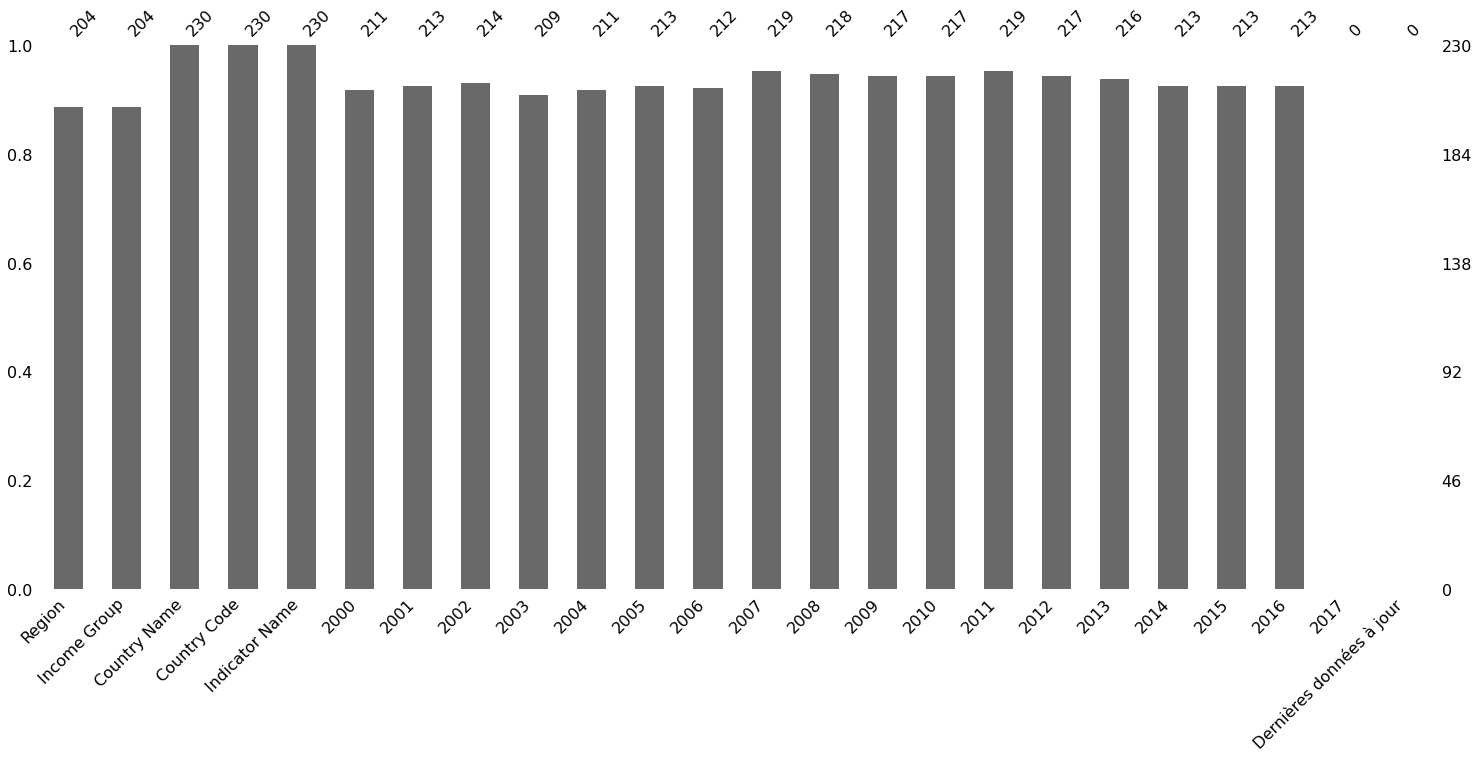

In [91]:
msno.bar(df_internet.sample(230))

In [92]:
df_internet_complet = df_internet.fillna(method ='ffill', axis = 1) 

In [93]:
df_internet_complet['Dernières données à jour'] = pd.to_numeric(df_internet_complet['Dernières données à jour'],errors='coerce', downcast="float")

In [94]:
df_internet_complet.sort_values('Dernières données à jour', ascending = False).head(20)

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernières données à jour
408190,Europe & Central Asia,High income: OECD,Iceland,ISL,Internet users (per 100 people),44.470534,49.392995,79.12,83.14,83.88,...,93.0,93.39,94.819687,96.2098,96.5468,98.16,98.2,98.240016,98.240016,98.240013
503480,Europe & Central Asia,High income: nonOECD,Liechtenstein,LIE,Internet users (per 100 people),36.51523,45.116853,59.470711,58.809692,64.007448,...,75.0,80.0,85.0,89.4077,93.8,95.21,96.641195,98.093904,98.093904,98.093903
169965,North America,High income: nonOECD,Bermuda,BMU,Internet users (per 100 people),42.94986,47.5097,52.031597,56.522012,60.990867,...,83.25,84.21,88.336,91.299305,95.3,96.8,98.32361,98.0,98.0,98.000000
144310,Middle East & North Africa,High income: nonOECD,Bahrain,BHR,Internet users (per 100 people),6.153733,15.038634,18.050721,21.554945,21.458681,...,53.0,55.0,76.999966,88.0,90.00004,90.503133,93.478301,97.999981,97.999981,97.999977
107660,Europe & Central Asia,High income: nonOECD,Andorra,AND,Internet users (per 100 people),10.538836,10.538836,11.260469,13.546413,26.837954,...,78.53,81.0,81.0,86.434425,94.0,95.9,96.91,97.930637,97.930637,97.930634
510810,Europe & Central Asia,High income: OECD,Luxembourg,LUX,Internet users (per 100 people),22.887328,36.163423,39.84,54.55,65.88,...,87.31,90.62,90.029859,91.949924,93.7765,94.67,97.3341,97.49393,97.49393,97.493927
624425,Europe & Central Asia,High income: OECD,Norway,NOR,Internet users (per 100 people),52.0,64.0,72.84,78.13,77.69,...,92.08,93.39,93.489983,94.649978,95.0534,96.3,96.8103,97.298204,97.298204,97.298203
283580,Europe & Central Asia,High income: OECD,Denmark,DNK,Internet users (per 100 people),39.172431,42.957525,64.25,76.26,80.93,...,86.84,88.72,89.810013,92.260012,94.6297,95.99,96.3305,96.967785,96.967785,96.967789
565785,Europe & Central Asia,High income: nonOECD,Monaco,MCO,Internet users (per 100 people),42.184863,46.646142,48.047117,49.491169,52.490197,...,70.1,75.0,80.3,87.0,90.7,92.4,93.363302,95.208178,95.208178,95.208176
323895,Europe & Central Asia,High income: nonOECD,Faroe Islands,FRO,Internet users (per 100 people),32.916392,43.246984,53.299222,58.912641,66.533599,...,75.18,75.2,80.732173,85.335189,90.0,93.3,94.2,95.108682,95.108682,95.108681


In [95]:
df_internet_complet.head(50)

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernières données à jour
1375,NaN,NaN,Arab World,ARB,Internet users (per 100 people),1.139541,1.561288,2.693061,3.645881,7.006812,...,22.973689,26.747251,29.707761,34.014224,36.868602,36.868602,36.868602,36.868602,36.868602,36.868603
5040,NaN,NaN,East Asia & Pacific,EAS,Internet users (per 100 people),5.59268,7.252166,8.993588,10.547244,12.596964,...,29.513198,34.230838,37.365156,40.709345,44.577349,46.812103,49.787924,52.796321,52.796321,52.796322
8705,NaN,NaN,East Asia & Pacific (excluding high income),EAP,Internet users (per 100 people),1.897116,2.77909,4.40499,5.762102,6.885265,...,23.769242,28.957572,32.385761,36.068349,39.708933,42.062234,45.210103,48.386621,48.386621,48.386620
12370,NaN,NaN,Euro area,EMU,Internet users (per 100 people),22.524339,27.351403,35.191466,42.096423,47.484586,...,67.12983,71.036722,72.001164,74.092136,75.82156,77.002322,78.666346,80.446726,80.446726,80.446724
16035,NaN,NaN,Europe & Central Asia,ECS,Internet users (per 100 people),13.184147,16.405569,23.057519,28.363374,32.359086,...,50.566038,56.119117,58.83463,63.486253,66.306669,68.944351,71.162003,73.914751,73.914751,73.914749
19700,NaN,NaN,Europe & Central Asia (excluding high income),ECA,Internet users (per 100 people),2.023515,2.977254,5.155373,7.483845,10.976177,...,27.739555,35.884481,40.787203,48.703942,52.870309,56.90142,60.264056,63.67275,63.67275,63.672749
23365,NaN,NaN,European Union,EUU,Internet users (per 100 people),20.556694,25.299527,35.13952,41.822849,46.831965,...,67.214643,70.630896,71.558066,73.699365,75.497623,75.497623,75.497623,75.497623,75.497623,75.497620
27030,NaN,NaN,Heavily indebted poor countries (HIPC),HPC,Internet users (per 100 people),0.173378,0.257623,0.395052,0.604412,0.914567,...,3.153333,4.929979,5.408633,6.684818,8.144384,10.459854,13.142045,15.667876,15.667876,15.667876
30695,NaN,NaN,High income,HIC,Internet users (per 100 people),30.6894,36.756791,45.225699,49.933772,55.088364,...,70.190163,72.280414,72.819457,75.52501,76.842757,78.472283,80.014664,81.967715,81.967715,81.967712
34360,NaN,NaN,Latin America & Caribbean,LCN,Internet users (per 100 people),3.903713,5.650754,8.88735,11.287153,14.402387,...,31.034304,34.709622,39.34647,43.184018,46.261883,48.769199,54.279733,56.373113,56.373113,56.373112


In [96]:
df_internet_complet.groupby('Income Group').median('Dernières données à jour')

,Dernières données à jour
Income Group,
High income: OECD,87.237335
High income: nonOECD,77.289398
Low income,11.541593
Lower middle income,29.204401
Upper middle income,54.818771


In [97]:
df_internet_complet.loc[df_internet_complet['Dernières données à jour'].isnull(),:]

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernières données à jour
103995,East Asia & Pacific,Upper middle income,American Samoa,ASM,Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),...,Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),NaN
232270,Europe & Central Asia,High income: nonOECD,Channel Islands,CHI,Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),...,Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),NaN
272585,Latin America & Caribbean,High income: nonOECD,Curacao,CUW,Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),...,Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),NaN
430180,Europe & Central Asia,High income: nonOECD,Isle of Man,IMN,Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),...,Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),NaN
470495,Europe & Central Asia,Lower middle income,Kosovo,XKX,Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),...,Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),NaN
591440,NaN,NaN,Nauru,NRU,Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),...,Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),NaN
620760,East Asia & Pacific,High income: nonOECD,Northern Mariana Islands,MNP,Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),...,Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 people),Internet users (per 100 peopl

In [98]:
# EN COURS DE CODAGE POUR CHAQUE INDICATEUR: METTRE MEDIANE DANS DERNIERES DONNEES
#
# for index in data_na.index:
#    if df_internet_complet.loc[:,'Income Group'] == 'High income: OECD':
#        then df_internet_complet.loc[:, 'Dernières données à jour'] = 87.237335
#    else 
#        df_internet_complet.loc[:, 'Dernières données à jour'] = 0

In [99]:
# supprimer les lignes avec NAN
df_internet_suppr_NAN = df_internet_complet.dropna(axis = 0, how = 'any')

In [100]:
# supprimer les lignes avec dernières données < 60
peu_connecte = 50
df_internet_selection = df_internet_suppr_NAN.drop(df_internet_suppr_NAN[df_internet_suppr_NAN ['Dernières données à jour'] < peu_connecte].index)

In [101]:
df_internet_selection.sort_values('Dernières données à jour', ascending = True)

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernières données à jour
349550,Europe & Central Asia,Lower middle income,Georgia,GEO,Internet users (per 100 people),0.484746,0.992344,1.587876,2.558816,3.886221,...,20.07,26.9,31.52,36.94,43.3,44.0,47.56976,50.001637,50.001637,50.001637
811340,Middle East & North Africa,Upper middle income,Tunisia,TUN,Internet users (per 100 people),2.75074,4.297966,5.252887,6.490846,8.528818,...,34.07,36.8,39.1,41.4416,43.8,46.16,48.519836,50.879675,50.879675,50.879677
646415,Latin America & Caribbean,Lower middle income,Paraguay,PRY,Internet users (per 100 people),0.747631,1.098794,1.79497,2.111942,3.452438,...,18.9,19.8,24.763516,29.34,36.9,43.0,48.438688,51.349874,51.349874,51.349873
833330,Europe & Central Asia,Lower middle income,Ukraine,UKR,Internet users (per 100 people),0.716184,1.23876,1.873885,3.148128,3.489478,...,17.9,23.3,28.708263,35.27,40.954129,46.235975,48.884644,52.481808,52.481808,52.481808
239600,East Asia & Pacific,Upper middle income,China,CHN,Internet users (per 100 people),1.775913,2.63965,4.595704,6.2,7.3,...,28.9,34.3,38.3,42.300117,45.8,47.9,50.3,53.2,53.2,53.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107660,Europe & Central Asia,High income: nonOECD,Andorra,AND,Internet users (per 100 people),10.538836,10.538836,11.260469,13.546413,26.837954,...,78.53,81.0,81.0,86.434425,94.0,95.9,96.91,97.930637,97.930637,97.930634
144310,Middle East & North Africa,High income: nonOECD,Bahrain,BHR,Internet users (per 100 people),6.153733,15.038634,18.050721,21.554945,21.458681,...,53.0,55.0,76.999966,88.0,90.00004,90.503133,93.478301,97.999981,97.999981,97.999977
169965,North America,High income: nonOECD,Bermuda,BMU,Internet users (per 100 people),42.94986,47.5097,52.031597,56.522012,60.990867,...,83.25,84.21,88.336,91.299305,95.3,96.8,98.32361,98.0,98.0,98.000000
503480,Europe & Central Asia,High income: nonOECD,Liechtenstein,LIE,Internet users (per 100 people),36.51523,45.116853,59.470711,58.809692,64.007448,...,75.0,80.0,85.0,89.4077,93.8,95.21,96.641195,98.093904,98.093904,98.093903


## Traitement des indicateurs

In [102]:
df_pivot_pop1_selection = df_pop1_selection.pivot(index='Country Name', columns='Indicator Name', values='Dernières données à jour')

In [103]:
df_pivot_secondaire3 = df_secondaire3_selection.pivot(index='Country Name', columns='Indicator Name', values='Dernières données à jour')

In [104]:
df_pivot_aide_gouvernement1 = df_aide_gouvernement1_complet.pivot(index='Country Name', columns='Indicator Name', values='Dernières données à jour')

In [105]:
df_pivot_internet = df_internet_selection.pivot(index='Country Name', columns='Indicator Name', values='Dernières données à jour')

In [106]:
result = pd.concat([df_pivot_pop1_selection, df_pivot_secondaire3, df_pivot_aide_gouvernement1,df_pivot_internet], axis = 1, join = 'inner')

In [107]:
result.head(5)

Indicator Name,"Population, total","Enrolment in secondary education, both sexes (number)",Expenditure on secondary as % of government expenditure on education (%),Internet users (per 100 people)
Country Name,,,,
Albania,2876101.0,315079.00,19.831560,66.363441
Argentina,43847432.0,4450741.00,41.477322,70.150764
Armenia,2924816.0,240291.00,54.462040,62.000000
Australia,24127160.0,2371284.00,32.361992,88.238655
Austria,8747358.0,691071.25,40.363781,84.323334


In [108]:
result.dtypes

Indicator Name
Population, total                                                           float32
Enrolment in secondary education, both sexes (number)                       float32
Expenditure on secondary as % of government expenditure on education (%)    float32
Internet users (per 100 people)                                             float32
dtype: object

In [109]:
# SOLUTION A CHERCHER pour drop le seuil internet < 60
#Seuil_Internet = 60

# result_internet = result[result['Internet users (per 100 people)'] > Seuil_Internet]

In [110]:
# result_internet.head()

In [111]:
# convertir et compter les Nan par pays ==> Normalement à 0 car on aura complété par indicateur
# result.loc[['Population, total'.isna]]
# result.isna().sum() A VERIFIER AVANT D'ENLEVER SI TOUT EST OK

In [112]:
# result_internet = result.drop((result.loc[:, ['Internet users (per 100 people)'] > 50]) , axis = 1)
# result_internet

## Les Scores

In [113]:
# result['SCORE_INSCRIPTION1'] = pd.qcut(result['Enrolment in secondary education, both sexes (number)'],5)
result['SCORE_INSCRIPTION'] = result['Enrolment in secondary education, both sexes (number)']/result['Enrolment in secondary education, both sexes (number)'].max()

In [114]:
result['SCORE_AIDE_GOUV'] = result['Expenditure on secondary as % of government expenditure on education (%)']/result['Expenditure on secondary as % of government expenditure on education (%)'].max()

In [115]:
result['SCORE_INTERNET'] = result['Internet users (per 100 people)']/result['Internet users (per 100 people)'].max()

In [116]:
# ANALYSE: corrélation entre les inscriptions et les aides gouvernementales

In [117]:
result[['SCORE_INSCRIPTION','SCORE_AIDE_GOUV']].corr()

Indicator Name,SCORE_INSCRIPTION,SCORE_AIDE_GOUV
Indicator Name,,
SCORE_INSCRIPTION,1.000000,0.068582
SCORE_AIDE_GOUV,0.068582,1.000000


In [118]:
result['SCORE'] = (result['SCORE_AIDE_GOUV'] * 0.2 + (result['SCORE_INTERNET'] * 0.4) + result['SCORE_INSCRIPTION'] * 0.4)

In [119]:
result.sort_values('SCORE', ascending = False)

Indicator Name,"Population, total","Enrolment in secondary education, both sexes (number)",Expenditure on secondary as % of government expenditure on education (%),Internet users (per 100 people),SCORE_INSCRIPTION,SCORE_AIDE_GOUV,SCORE_INTERNET,SCORE
Country Name,,,,,,,,
Mexico,127540424.0,12993322.0,31.982100,59.540447,1.000000,0.486345,0.607556,0.740291
United Kingdom,65637240.0,6556991.5,41.035831,94.775803,0.504643,0.624024,0.967100,0.713502
Japan,126994512.0,7227485.0,37.804859,92.000000,0.556246,0.574891,0.938776,0.712987
Germany,82667688.0,7112949.5,41.965271,89.647102,0.547431,0.638158,0.914767,0.712511
Turkey,79512424.0,10969178.0,42.864960,58.347733,0.844217,0.651839,0.595385,0.706208
...,...,...,...,...,...,...,...,...
Montenegro,622781.0,60504.0,NaN,69.881645,0.004657,NaN,0.713078,NaN
Russian Federation,144342400.0,9384610.0,NaN,76.409088,0.722264,NaN,0.779685,NaN
Saudi Arabia,32275688.0,3419441.0,NaN,73.750900,0.263169,NaN,0.752560,NaN


In [120]:
result['Population, total'].describe()

count           81.0
mean      22660010.0
std       31605824.0
min         582972.0
25%        4034119.0
50%        8747358.0
75%       31568180.0
max      144342400.0
Name: Population, total, dtype: float64

In [121]:
result.describe()

Indicator Name,"Population, total","Enrolment in secondary education, both sexes (number)",Expenditure on secondary as % of government expenditure on education (%),Internet users (per 100 people),SCORE_INSCRIPTION,SCORE_AIDE_GOUV,SCORE_INTERNET,SCORE
count,81.0,7.900000e+01,70.000000,81.000000,79.000000,70.000000,81.000000,70.000000
mean,22660010.0,1.906443e+06,35.523655,74.083305,0.146725,0.540201,0.755952,0.470723
std,31605824.0,2.670640e+06,9.974844,13.404317,0.205539,0.151685,0.136779,0.099250
min,582972.0,3.008800e+04,12.111410,50.001637,0.002316,0.184176,0.510221,0.298217
25%,4034119.0,2.867965e+05,30.840693,62.000000,0.022073,0.468988,0.632653,0.406655
50%,8747358.0,6.677180e+05,35.976601,74.376648,0.051389,0.547089,0.758946,0.458714
75%,31568180.0,2.538356e+06,41.906059,85.622200,0.195358,0.637257,0.873696,0.520440
max,144342400.0,1.299332e+07,65.760048,97.999977,1.000000,1.000000,1.000000,0.740291


In [122]:
#result_ind = result.reset_index(drop = False)

result_ind= result.reset_index()

In [123]:
result_ind

Indicator Name,Country Name,"Population, total","Enrolment in secondary education, both sexes (number)",Expenditure on secondary as % of government expenditure on education (%),Internet users (per 100 people),SCORE_INSCRIPTION,SCORE_AIDE_GOUV,SCORE_INTERNET,SCORE
0,Albania,2876101.0,315079.00,19.831560,66.363441,0.024249,0.301575,0.677178,0.340886
1,Argentina,43847432.0,4450741.00,41.477322,70.150764,0.342541,0.630737,0.715824,0.549493
2,Armenia,2924816.0,240291.00,54.462040,62.000000,0.018493,0.828193,0.632653,0.426097
3,Australia,24127160.0,2371284.00,32.361992,88.238655,0.182500,0.492122,0.900395,0.531582
4,Austria,8747358.0,691071.25,40.363781,84.323334,0.053187,0.613804,0.860442,0.488212
...,...,...,...,...,...,...,...,...,...
76,United Arab Emirates,9269612.0,NaN,NaN,90.600006,NaN,NaN,0.924490,NaN
77,United Kingdom,65637240.0,6556991.50,41.035831,94.775803,0.504643,0.624024,0.967100,0.713502
78,Uruguay,3444006.0,291805.00,33.174931,66.400002,0.022458,0.504485,0.677551,0.380901
79,"Venezuela, RB",31568180.0,2522661.00,19.035259,60.000000,0.194151,0.289465,0.612245,0.380451


In [124]:
result_ind.isna().sum()

Indicator Name
Country Name                                                                 0
Population, total                                                            0
Enrolment in secondary education, both sexes (number)                        2
Expenditure on secondary as % of government expenditure on education (%)    11
Internet users (per 100 people)                                              0
SCORE_INSCRIPTION                                                            2
SCORE_AIDE_GOUV                                                             11
SCORE_INTERNET                                                               0
SCORE                                                                       11
dtype: int64

### Analyse

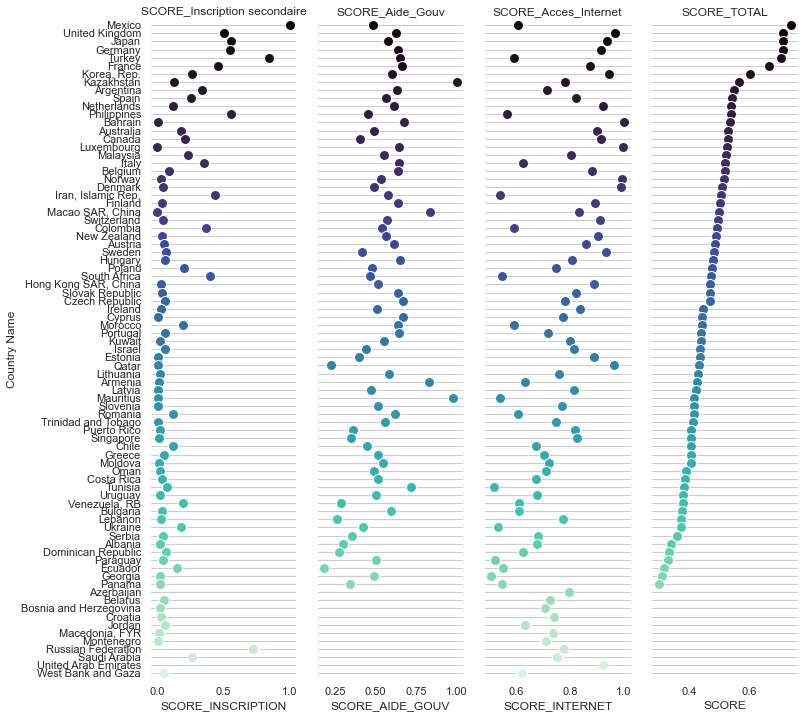

In [125]:
sns.set_theme(style="whitegrid")

# Faire les grilles
g = sns.PairGrid(result_ind.sort_values("SCORE", ascending=False),
                 x_vars=result_ind.columns[-4 :], y_vars=["Country Name"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="mako", linewidth=1, edgecolor="w")

titles = ["SCORE_Inscription secondaire", "SCORE_Aide_Gouv", "SCORE_Acces_Internet",
          "SCORE_TOTAL"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)


In [126]:
result_ind.sort_values('SCORE', ascending = False).head(10)

Indicator Name,Country Name,"Population, total","Enrolment in secondary education, both sexes (number)",Expenditure on secondary as % of government expenditure on education (%),Internet users (per 100 people),SCORE_INSCRIPTION,SCORE_AIDE_GOUV,SCORE_INTERNET,SCORE
46,Mexico,127540424.0,12993322.0,31.982100,59.540447,1.000000,0.486345,0.607556,0.740291
77,United Kingdom,65637240.0,6556991.5,41.035831,94.775803,0.504643,0.624024,0.967100,0.713502
33,Japan,126994512.0,7227485.0,37.804859,92.000000,0.556246,0.574891,0.938776,0.712987
25,Germany,82667688.0,7112949.5,41.965271,89.647102,0.547431,0.638158,0.914767,0.712511
74,Turkey,79512424.0,10969178.0,42.864960,58.347733,0.844217,0.651839,0.595385,0.706208
23,France,66896108.0,5947212.0,43.684490,85.622200,0.457713,0.664301,0.873696,0.665424
36,"Korea, Rep.",51245708.0,3396766.0,39.355518,92.716545,0.261424,0.598472,0.946087,0.602699
35,Kazakhstan,17797032.0,1713090.0,65.760048,76.800003,0.131844,1.000000,0.783674,0.566207
1,Argentina,43847432.0,4450741.0,41.477322,70.150764,0.342541,0.630737,0.715824,0.549493
69,Spain,46443960.0,3313127.0,36.905628,80.561333,0.254987,0.561217,0.822055,0.543060


<AxesSubplot:title={'center':'Dernières données à jour'}, xlabel='Region'>

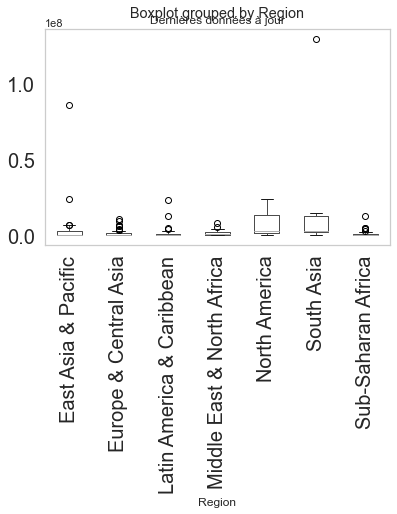

In [127]:
df_secondaire3_complet.boxplot(by ='Region', column =['Dernières données à jour'], grid = False, rot=90, fontsize = 20)

<AxesSubplot:title={'center':'Dernières données à jour'}, xlabel='Region'>

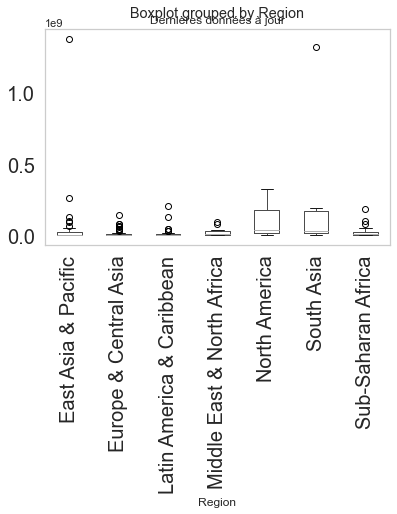

In [128]:
df_pop1_complet.boxplot(by ='Region', column =['Dernières données à jour'], grid = False, rot=90, fontsize = 20)

In [129]:
df_secondaire3_complet.groupby('Region').median('Dernières données à jour')

,Dernières données à jour
Region,
East Asia & Pacific,330163.0
Europe & Central Asia,553448.0
Latin America & Caribbean,278941.0
Middle East & North Africa,766943.0
North America,2697507.0
South Asia,2988023.5
Sub-Saharan Africa,567838.0


In [130]:
df_secondaire3_complet.groupby('Region').mean('Dernières données à jour')

,Dernières données à jour
Region,
East Asia & Pacific,4.965728e+06
Europe & Central Asia,1.513734e+06
Latin America & Caribbean,1.653885e+06
Middle East & North Africa,1.768009e+06
North America,8.977108e+06
South Asia,2.060894e+07
Sub-Saharan Africa,1.229300e+06


In [131]:
# TO DO: faire un histogramme horizontal avec les scores (en couleurs) qui se cumulent pour les 10 premiers pays


In [132]:
# TO DO: graphique de l'évolution des inscriptions pour les 10 premiers pays en évolution par an